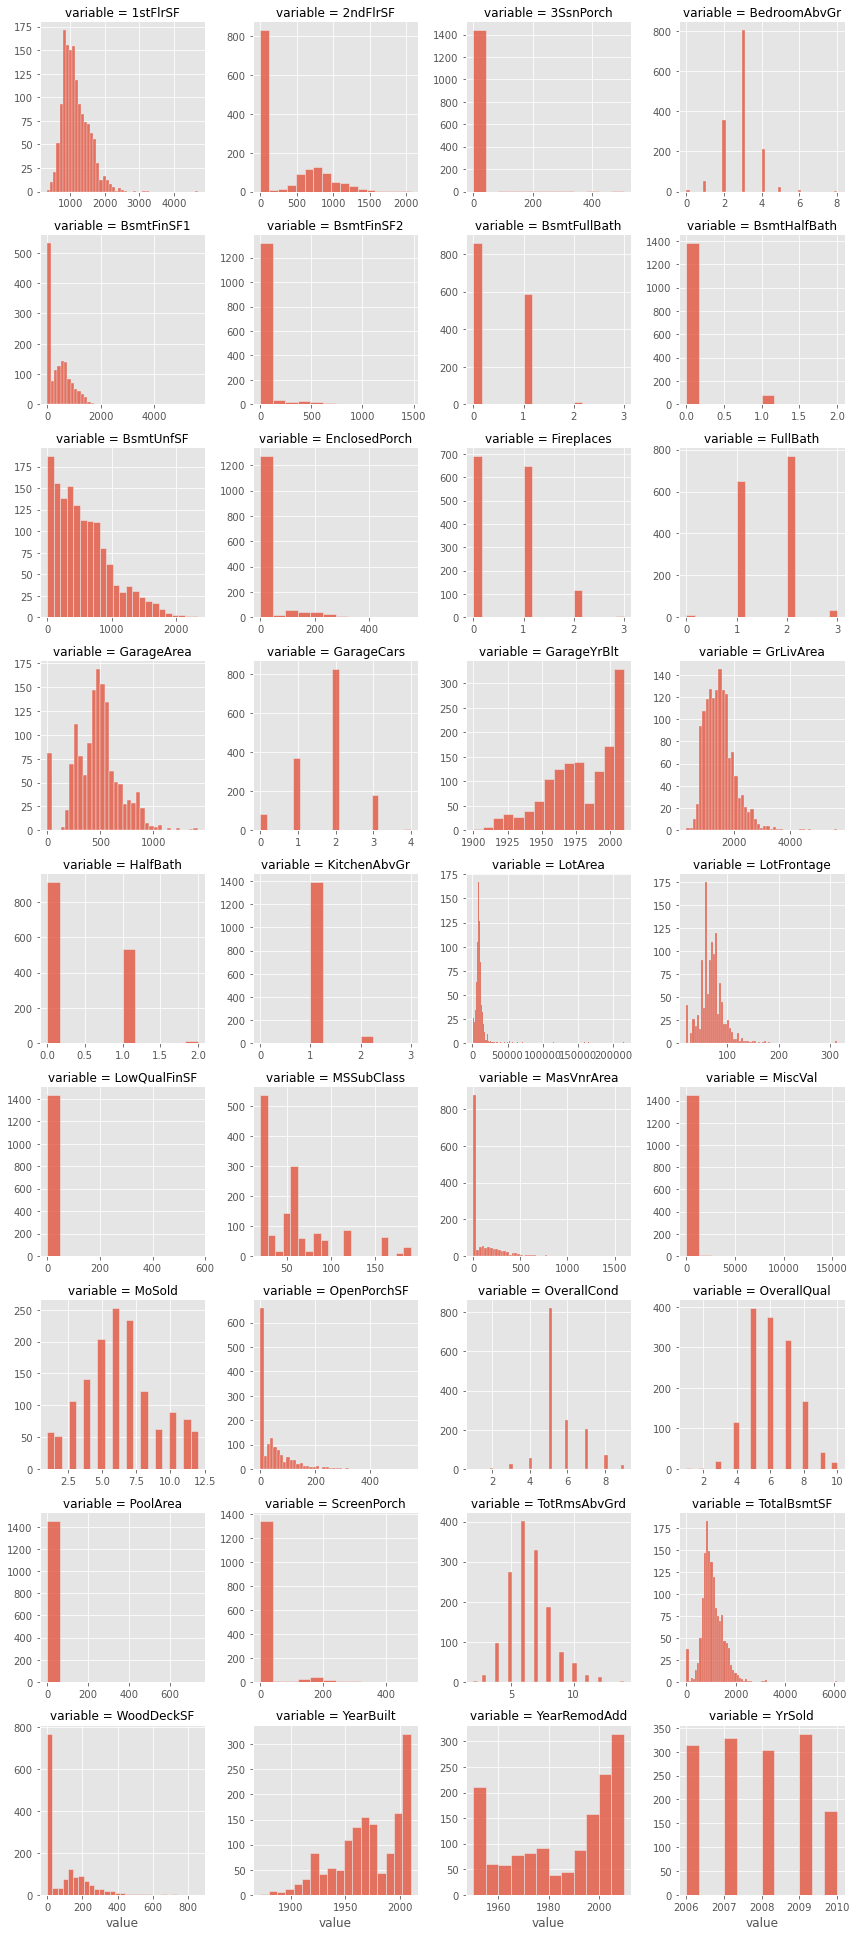

In [614]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#import scipy.stats
testFilepath=r"C:\Users\s-mkandemir\Anaconda3\linear_test.csv"
trainFilepath=r"C:\Users\s-mkandemir\Anaconda3\linear_train.csv"
testData=pd.read_csv(testFilepath)
trainData=pd.read_csv(trainFilepath)
def rmse(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)
def numOrCat():    
    num= trainData.select_dtypes(include=['int64','float64']).columns
    num= num.drop(['Id','SalePrice'])
    cat= trainData.select_dtypes(include=['object']).columns
    return list(num), list(cat)
num,cat = numOrCat()
f = pd.melt(trainData, value_vars=sorted(num))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')

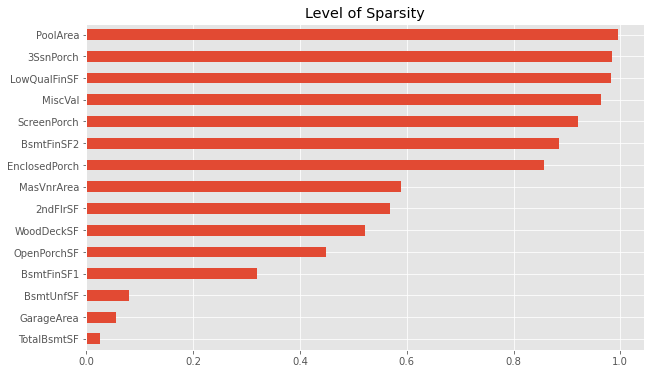

In [615]:
count= ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars',]
nonCount= [f for f in num if f not in count]
sparse= (trainData[nonCount] == 0).sum() / trainData.shape[0]
sparse[sparse> 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Level of Sparsity')
plt.show()

In [616]:
trainData['MSSubClass'] = trainData.MSSubClass.apply(lambda x: str(x))
trainData['MoSold'] = trainData.MoSold.apply(lambda x: str(x))
trainData['YrSold'] = trainData.YrSold.apply(lambda x: str(x))
num,cat=numOrCat()


C:\Users\s-mkandemir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


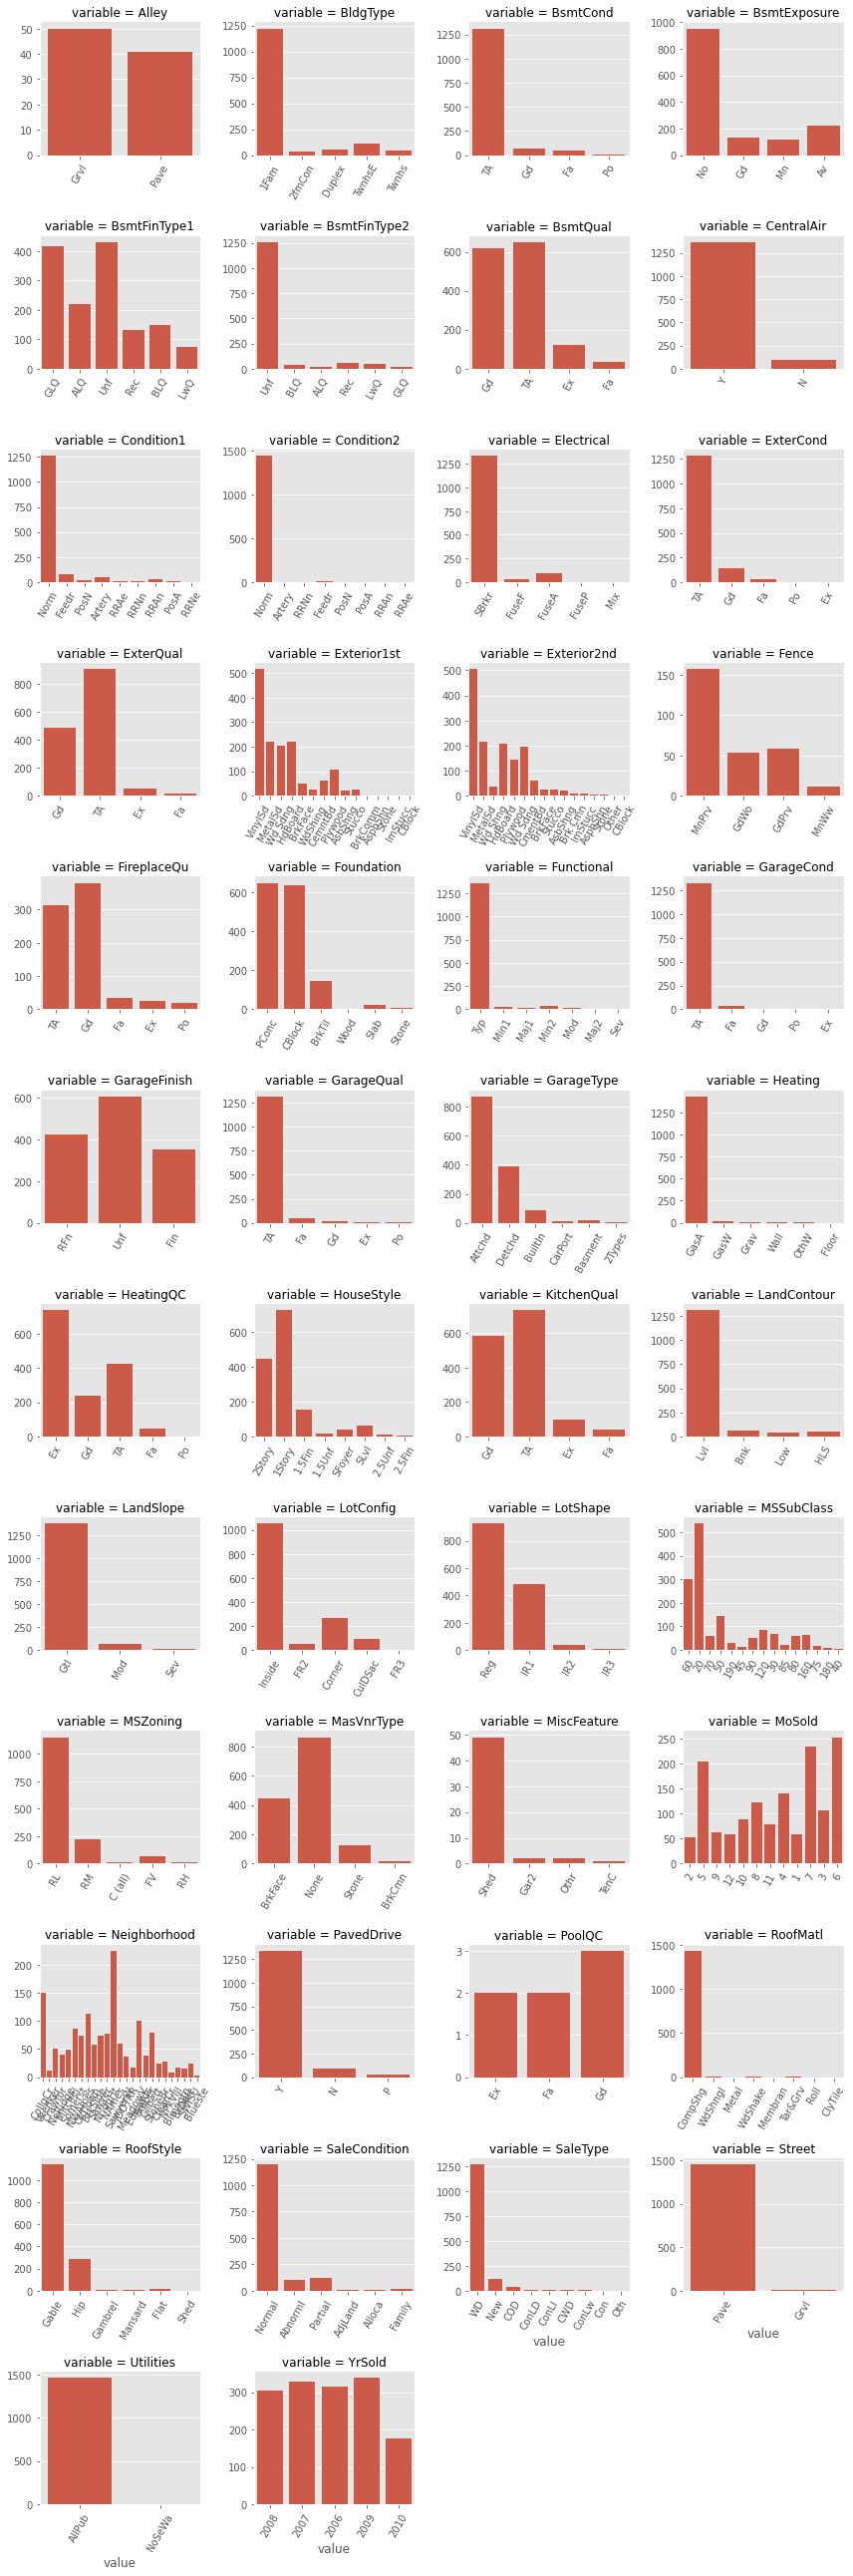

In [617]:
f = pd.melt(trainData, value_vars=sorted(cat))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [618]:
trainData.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)
trainData.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
trainData.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
trainData.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
trainData.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
trainData.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
trainData.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
trainData.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
trainData.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
trainData.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
trainData.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
trainData.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)
trainData.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
trainData[converted_features] = trainData[converted_features].fillna(0)
num,cat=numOrCat()

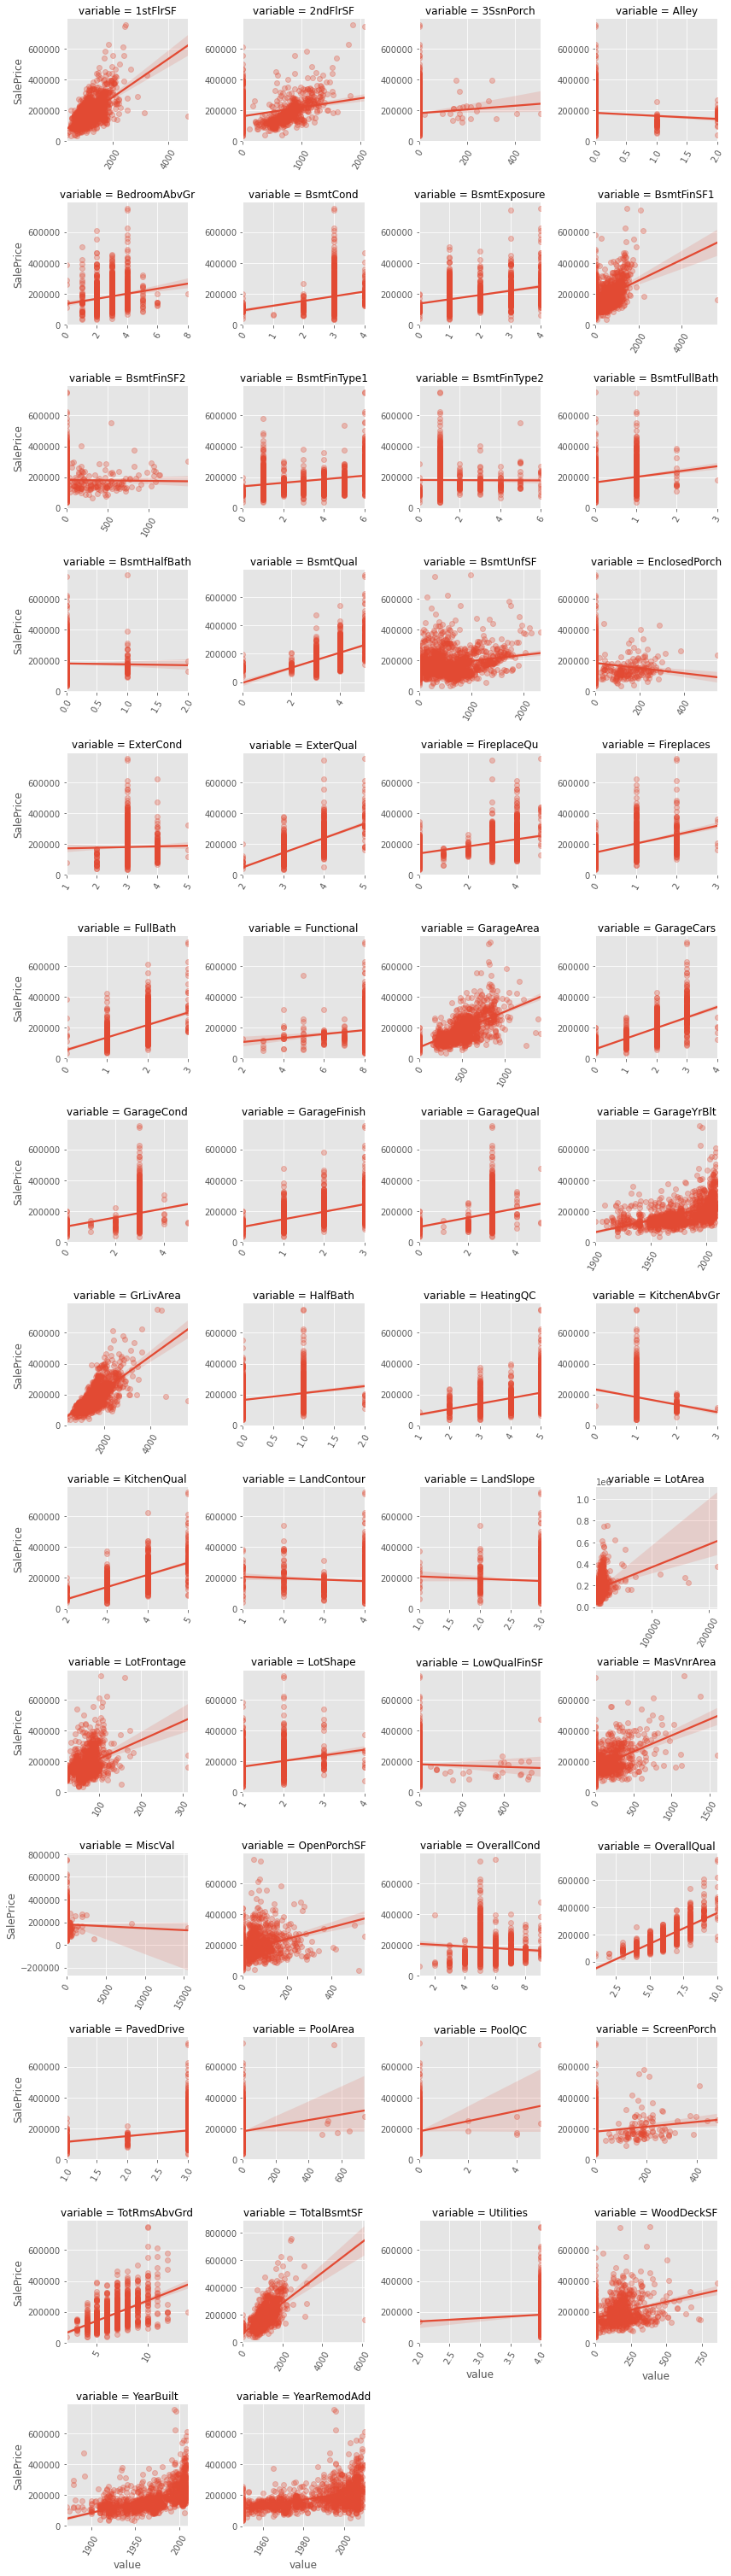

In [619]:
f = pd.melt(trainData, id_vars=['SalePrice'], value_vars=sorted(num))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

C:\Users\s-mkandemir\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\s-mkandemir\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


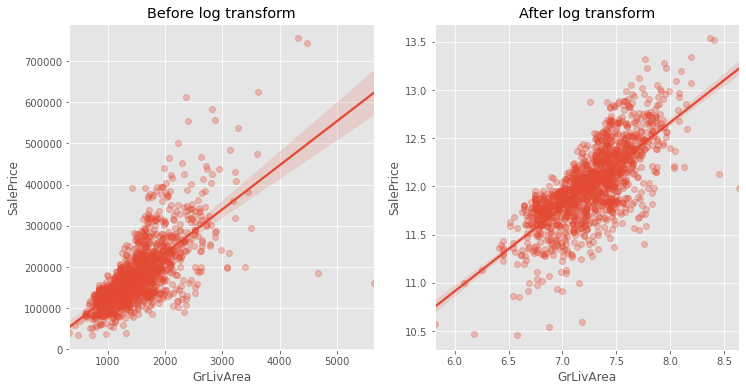

In [620]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(trainData.GrLivArea, trainData.SalePrice, scatter_kws={'alpha':0.3})
plt.title('Before log transform')

plt.subplot(122)
sns.regplot(np.log1p(trainData.GrLivArea), np.log1p(trainData.SalePrice), scatter_kws={'alpha':0.3})
plt.title('After log transform')
plt.show()

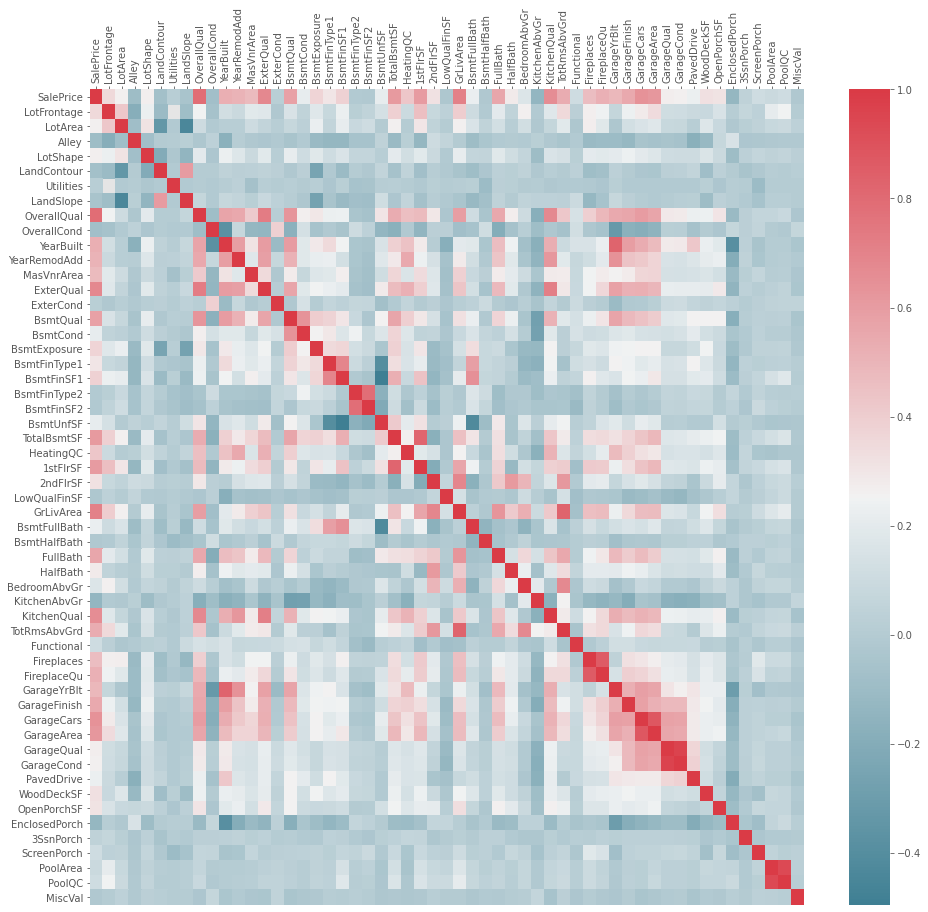

In [621]:
corr = trainData[['SalePrice'] + num].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

C:\Users\s-mkandemir\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


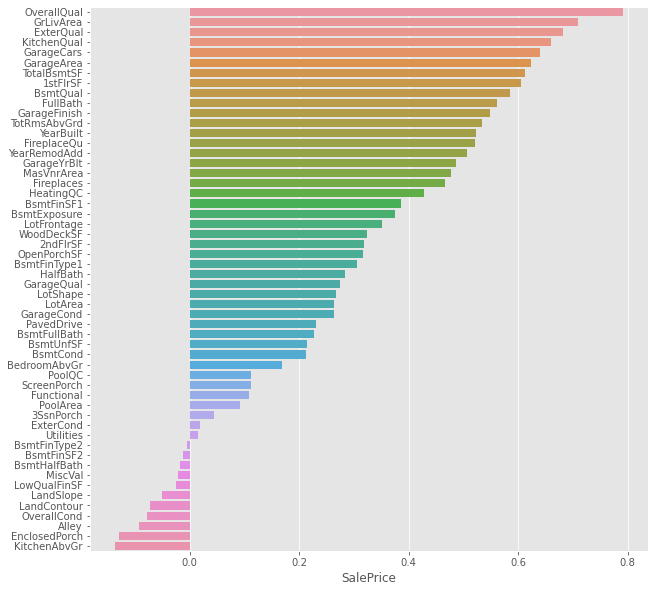

In [622]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [623]:
trainData[cat] = trainData[cat].fillna('Missing')
missingValues = (trainData[cat] == 'Missing').sum().sort_values(ascending=False)
missingValues[missingValues > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

In [624]:
trainData.loc[trainData.Electrical == 'Missing', 'Electrical'] = trainData.Electrical.mode()[0]
trainData.MasVnrType.value_counts()
trainData.MasVnrType.replace({'Missing':'None'}, inplace=True)
trainData.loc[(trainData.MasVnrType == 'None') & (trainData.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' 
trainData.loc[(trainData.MasVnrType == 'None') & (trainData.MasVnrArea == 1), 'MasVnrArea'] = 0 
for vnrType in trainData.MasVnrType.unique():
    trainData.loc[(trainData.MasVnrType == vnrType) & (trainData.MasVnrArea == 0), 'MasVnrArea'] = \
        trainData[trainData.MasVnrType == vnrType].MasVnrArea.mean()

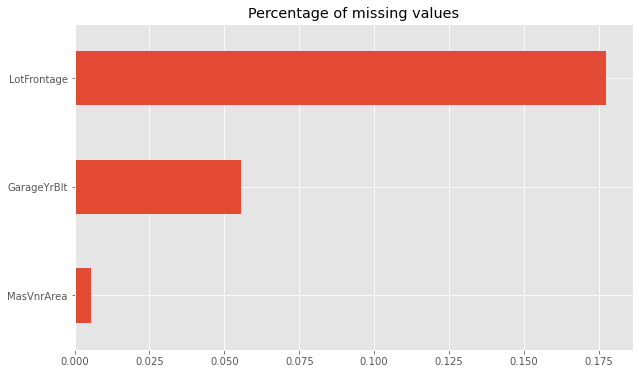

In [625]:
missingData = trainData.isnull().sum() / trainData.shape[0]
missingData[missingData > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [626]:
trainData.LotFrontage = trainData.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
trainData.MasVnrArea.fillna(0, inplace=True)
trainData.GarageYrBlt.fillna(0, inplace=True)


In [627]:
#check if there is any missing value left
trainData.isnull().sum().sum()

0

In [628]:
trainData.drop(trainData[trainData.GrLivArea >= 5000].index, inplace=True)
trainData['TotalSF'] = trainData.TotalBsmtSF + trainData.GrLivArea
trainData['TotalFloorSF'] = trainData['1stFlrSF'] + trainData['2ndFlrSF']
trainData['TotalPorchSF'] = trainData.OpenPorchSF+trainData.EnclosedPorch+trainData['3SsnPorch']+trainData.ScreenPorch
trainData['TotalBathrooms'] = trainData.FullBath + .5 * trainData.HalfBath+trainData.BsmtFullBath + .5 * trainData.BsmtHalfBath
trainData['HasBasement'] = trainData.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
trainData['HasGarage'] = trainData.GarageArea.apply(lambda x: 1 if x > 0 else 0)
trainData['HasPorch'] = trainData.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
trainData['HasPool'] = trainData.PoolArea.apply(lambda x: 1 if x > 0 else 0)
trainData['WasRemodeled'] = (trainData.YearRemodAdd != trainData.YearBuilt).astype(np.int64)
trainData['IsNew'] = (trainData.YearBuilt > 2000).astype(np.int64)
boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew', ]
num,cat=numOrCat()


In [629]:
num=[f for f in num if f not in boolean_features]
features = num + ['SalePrice']
for f in features:
    trainData.loc[:,f] = np.log1p(trainData[f])
yData = trainData['SalePrice']
ids=testData['Id']
trainData.drop('SalePrice', axis=1, inplace=True)
trainData.drop('Id', axis=1, inplace=True)
modelData=pd.get_dummies(trainData).copy()
xTrain,xTest,yTrain,yTest=train_test_split(modelData.copy(),yData,test_size=0.3,random_state=42)
scalerObj=StandardScaler()
xTrain.loc[:,num] = scalerObj.fit_transform(xTrain[num])
xTest.loc[:,num] = scalerObj.transform(xTest[num])
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(xTrain, yTrain)
alpha = lasso.best_params_['alpha']
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(xTrain, yTrain)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_
print('RMSE: {:.5f} | Test RMSE: {:.5f} | alpha: {:.5f}'.format(rmse(lasso, xTrain, yTrain).mean(), rmse(lasso, xTest, yTest).mean(), alpha))
yTrainPreds=lasso.predict(xTrain)
yTestPreds=lasso.predict(xTest)
trpr=np.exp(lasso.predict(xTrain))
tepr=np.exp(lasso.predict(xTest))
yTrainPredsList=trpr.tolist()
yTestPredsList=tepr.tolist()
pred=yTestPredsList+yTrainPredsList
df=pd.DataFrame()
df['Id']=ids
df['SalePrice']=pred
df.to_csv('submision.csv',index=False)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64
RMSE: 0.12160 | Test RMSE: 0.12457 | alpha: 0.00095


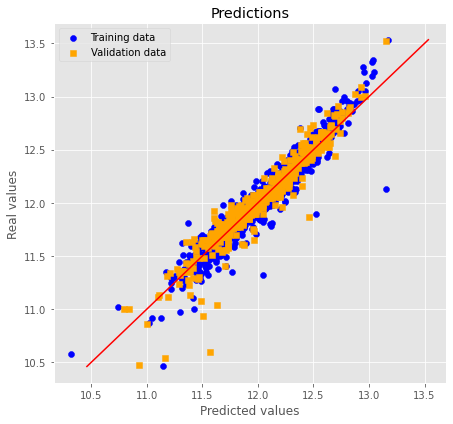

In [630]:
plt.figure(figsize=(12,6))
plt.subplot(122)
plt.scatter(yTrainPreds, yTrain, c='blue', marker='o', label='Training data')
plt.scatter(yTestPreds, yTest, c='orange', marker='s', label='Validation data')
plt.title('Predictions')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.legend(loc='upper left')
plt.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], c='red')
plt.tight_layout()
plt.show()